<b> Assignment 1 - Evolutionary Computation </b>
<ul>
  <li>Bruno Jerkovic s1061740</li>
  <li>Maksim Popov s1058129</li>
  <li>Christos Mavrikis s1059094</li>
</ul>

In [1]:
import numpy as np
import random, math
import matplotlib.pyplot as plt
%matplotlib inline

<style>
sup {
    vertical-align: super;
    font-size: smaller;
}
</style>

<b>Exercise 1 - (Schemata) </b>
<p>We have twp schemata A1 and A2 consisting of 9 bits. In order to get further insight, we should calculate the order of each schema. The order of a schema is the number of each fixed bits. </p>
<ul>
  <li>o(A1) = 4 </li>
  <li>o(A2) = 6 </li>
</ul>
<p>For a schema to survive all fixed bits must remain untouched. The effect of a mutation is given by the equation  <b>(1-pm) </b>. For our example, it would be  <b>(1-pm)=1-0.01 = 99.99 </b>. </p>
<ul>
  <li>Sm(A1) = (1-pm) <sup>o(A1)</sup> </li>
  <li>Sm(A2) = (1-pm) <sup>o(A2)</sup> </li>
</ul>
<p>From the lectures, we were taught that a schema with a lower order has a higher chance of survival. Thus, A1 has a higher chance to surive, as it has a lower order compared to A2. </p>

<b>Exercise 2 - (Building Block Hypothesis) </b>

BBH does not hold when there is no information available which could guide GA to global optimum through composition of partial sub-optimal solutions. \
The problem where the Building Block Hypothesis does not hold is the Kronecker delta function: \
$f(x)=Kronecker_delta(x)$, \
meaning f(x)=1 when x=0 and f(x)=0 when x!=0. The global optimum is achieved at x=0 and for every other x the value is 0. There is no way to guide the search towards the global optimum since none of the x's (where x!=0) provide information on where the global optima is.

<b>Exercise 3 - (Selection Pressure) </b>


In [2]:
import matplotlib.pyplot as plt
def fitness_fx(x):
    return x*x

def fitness_f1x(x):
    return 20+fitness_fx(x)


In [3]:
#Calculate fitness for x=2, x=3, x=4 and sum them up
x1 = fitness_fx(2)
print('For x1 = 2 fitness function fx(x1) = ',x1)
x2 = fitness_fx(3)
print('For x2 = 2 fitness function fx(x2) = ',x2)
x3 = fitness_fx(4)
print('For x3 = 3 fitness function fx(x3) = ',x3)
sum1 = x1 + x2 + x3
print('Total sum of all individuals = ',sum1)

For x1 = 2 fitness function fx(x1) =  4
For x2 = 2 fitness function fx(x2) =  9
For x3 = 3 fitness function fx(x3) =  16
Total sum of all individuals =  29


Probability of selection for x1 -> x1/sum =   0.14
Probability of selection for x2 -> x2/sum =   0.31
Probability of selection for x3 -> x3/sum =   0.55


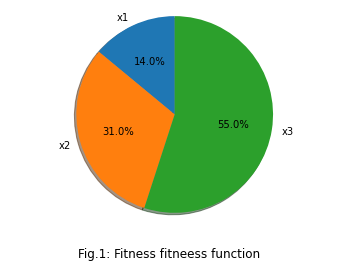

In [4]:
#Calculate probability of selection for fx(x)
print('Probability of selection for x1 -> x1/sum =  ',round(x1/sum1,2))
print('Probability of selection for x2 -> x2/sum =  ',round(x2/sum1,2))
print('Probability of selection for x3 -> x3/sum =  ',round(x3/sum1,2))

labels = 'x1', 'x2', 'x3'
sizes = [round(x1/sum1,2), round(x2/sum1,2), round(x3/sum1,2)]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
txt="Fig.1: Fitness fitneess function"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [5]:
#Calculate fitness for x=2, x=3, x=4 for new fitness function f1(x) and sum them up
x1 = fitness_f1x(2)
print('For x1 = 2 fitness function fx(x1) = ',x1)
x2 = fitness_f1x(3)
print('For x2 = 2 fitness function fx(x2) = ',x2)
x3 = fitness_f1x(4)
print('For x3 = 3 fitness function fx(x3) = ',x3)
sum1 = x1 + x2 + x3
print('Total sum of all individuals = ',sum1)

For x1 = 2 fitness function fx(x1) =  24
For x2 = 2 fitness function fx(x2) =  29
For x3 = 3 fitness function fx(x3) =  36
Total sum of all individuals =  89


Probability of selection for x1 -> x1/sum =   0.27
Probability of selection for x2 -> x2/sum =   0.33
Probability of selection for x3 -> x3/sum =   0.4


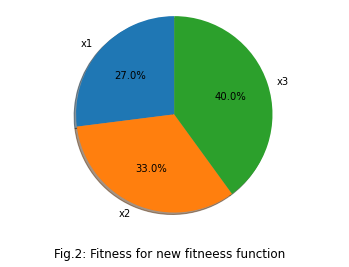

In [6]:
#Calculate probability of selection for f1x(x)
print('Probability of selection for x1 -> x1/sum =  ',round(x1/sum1,2))
print('Probability of selection for x2 -> x2/sum =  ',round(x2/sum1,2))
print('Probability of selection for x3 -> x3/sum =  ',round(x3/sum1,2))

labels = 'x1', 'x2', 'x3'
sizes = [round(x1/sum1,2), round(x2/sum1,2), round(x3/sum1,2)]


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  
txt="Fig.2: Fitness for new fitneess function"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

<b>Conclusion </b>
<p> The first fitness function fx(x) has a lower selection pressure. In the first figure plotted, we can see a dominant probability of 55%, and then two lower probabilities of 31% and 14%. The two lower probabilities of the individuals suggest a smaller probability of being choosen for survival or as parents and thus a higher survival for individual x=3.
When the new fitness function fx2 is introduced, the new values of the individuals are more fairly distributed. Thus,selection pressure increases. Compared to the previous figure now, the two lower individuals has seen an increase in their survival probabilities. This suggest a more equal chance for the individuals. Overall, fitter individuals are more likely to be choosen for survival or as parents . </p> ? maybe this is wrong

<b>Exercise 4 - (Role of selection in GA’ s) </b>

In [7]:
def counting_ones(num_iter, num_elems=100, swap=False, plot_ind=1):
    p = 1 / num_elems
    x = [random.randint(0, 1) for x in range(num_elems)]
    fitness = []
    for i in range(num_iter):
        x_m = [1-el if random.uniform(0,1) < p else el for el in x]
        if sum(x_m) > sum(x) and not swap:
            x = x_m
        if swap:
            x = x_m
        fitness.append(sum(x))
        if sum(x) == len(x):
            break
    
    plt.figure(plot_ind)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness score")
    plt.plot(fitness)
    plt.legend(['Best fitness'])

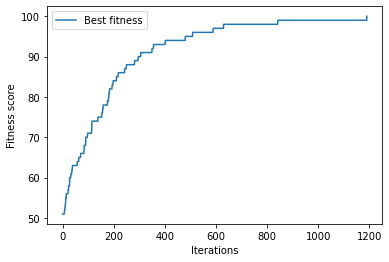

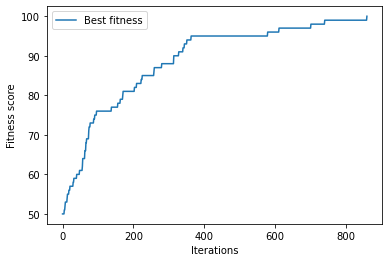

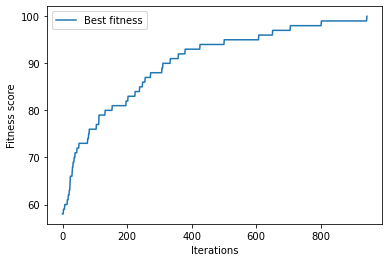

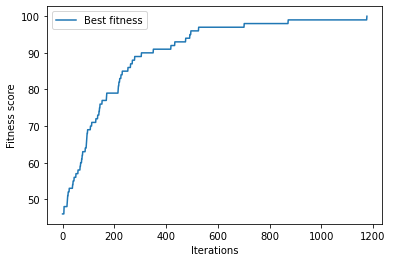

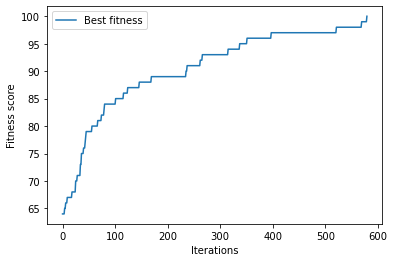

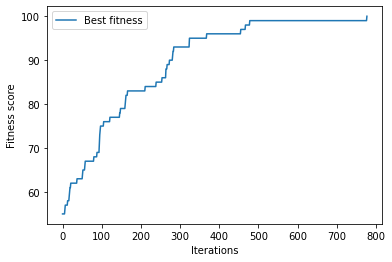

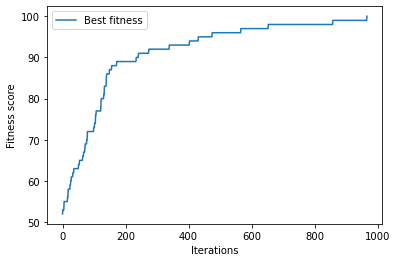

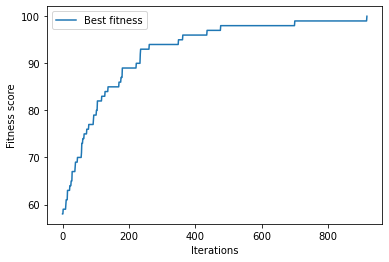

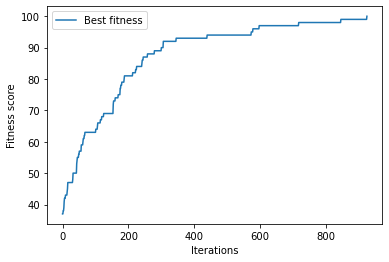

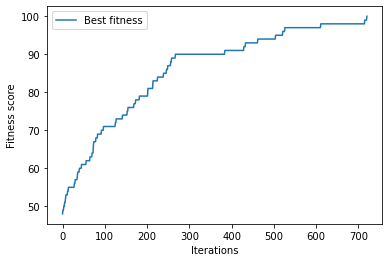

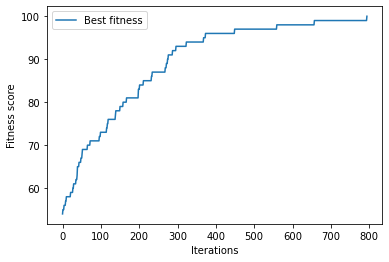

In [8]:
counting_ones(1500, 100)
for i in range(10):
    counting_ones(1500, 100, plot_ind=i+2)

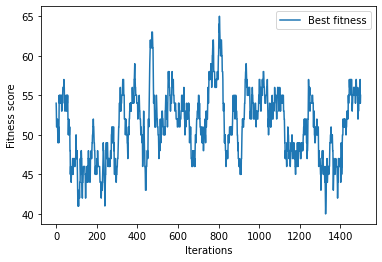

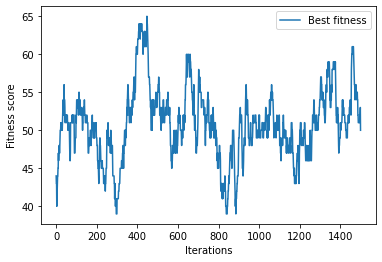

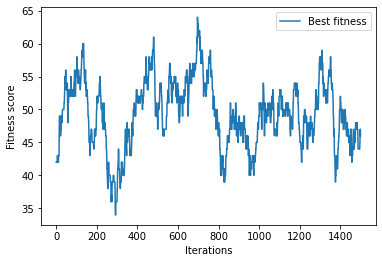

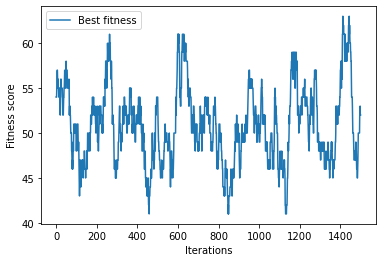

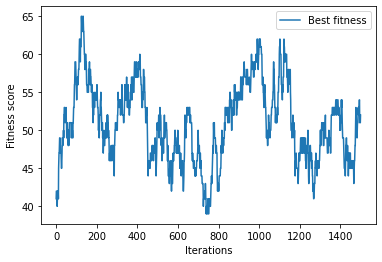

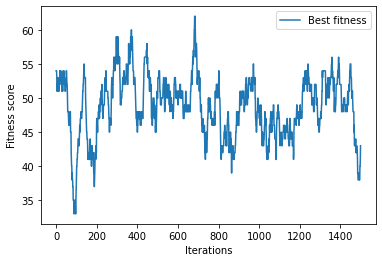

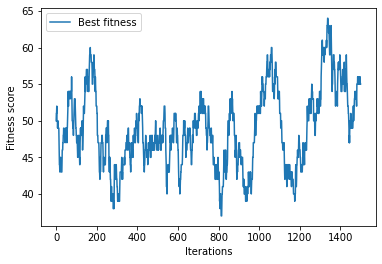

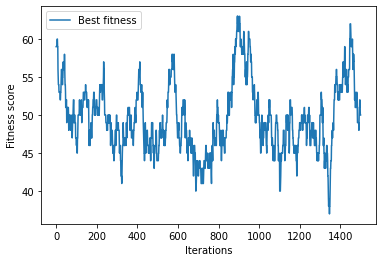

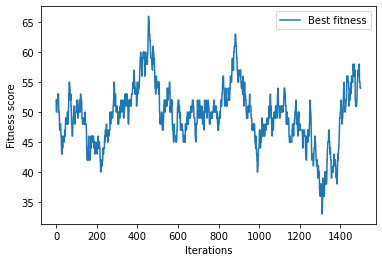

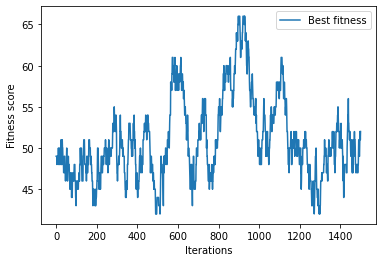

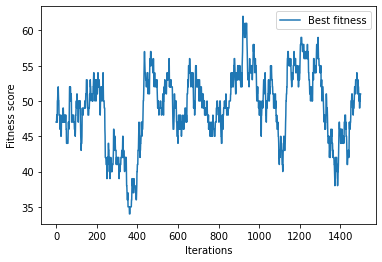

In [9]:
counting_ones(1500, 100, swap=True, plot_ind=1)
for i in range(10):
    counting_ones(1500, 100, swap=True, plot_ind=i+2)

For the plots outputted from the function which checks (for the better fit) before it swaps, we can see that after 1 500 iterations it reaches (at some point) the wanted score. With 10 runs, it converges to the goal 10 times. By selecting only the most fit one, the fit can only get better and there is no problem of getting stuck in local optimum. Hence, there is a good balance between exploration and exploitation.
For the plots outputted from the function which always swaps, compared to the previous plots, we can see a difference. By removing the condition to select the string with most ones (the string with the better fit), the algorithm is not converging towards no optimum. Exploration overdominates exploitation and the algorithm is, basically, performing a random walk. By running it 10 times, the stohasticity of the algorithm is even more visible. 

#### Exercise 5

(1+5)ES differs from (1+1)ES as it generates only 1 offspring after each generation. Since both of them look at $\rho=1$ best, the population size of both of them is 1. However, (1+5)ES searches a more space of the solutions, therefore it is less likely to get stuck in the local optimum as well as more likely to find the solution faster. \
(1+$\lambda$)ES resembles greedy algorithms less as the $\lambda$ gets larger. With the $\lambda = 1$, (1+$\lambda$)ES becomes a greedy algorithm.

<b> Exercise 6 - (Memetic algorithms vs simple EAs) </b>

In [10]:
# lOAD DATA
data = []
with open("file-tsp.txt") as fp:
    for line in fp.readlines():
        x, y = line.split()
        data.append([float(x), float(y)])

data = np.array(data)

In [11]:
# LOAD DATA for second dataset
data2 = []
with open("bavaria.tsp") as fp:
    reached_data = False
    for line in fp.readlines():
        if 'DISPLAY_DATA_SECTION' in line:
            reached_data = True
            continue
        if not reached_data or 'EOF' in line:
            continue
        x, y = line.split()[1:]
        data2.append([float(x), float(y)])

data2 = np.array(data2)

In [12]:
def order_crossover(parent1, parent2, p_c=1):
    # There is a probability that the crossover will not happen (it is 1-p_c)
    if random.uniform(0, 1) > p_c:
        return parent1, parent2
    
    p1 = parent1[0]
    p2 = parent2[0]
    
    # Initialize offsprings
    off1 = []
    off2 = []
    
    # Create 2 cut points and store them in a list
    while True:
        indexes = []
        indexes.append(random.randint(0, len(p1)-1))
        indexes.append(random.randint(0, len(p2)-1))
        if indexes[0] != indexes[1]:
            break
    indexes.sort()
    
    # Copy between parents' cutpoints to children
    off1 = p1[indexes[0] : indexes[1]]
    off2 = p2[indexes[0] : indexes[1]]
    
    # Rotate parents starting from 2nd cut point
    p1 = p1[-(len(p1)-indexes[1]):] + p1[:indexes[1]]
    p2 = p2[-(len(p2)-indexes[1]):] + p2[:indexes[1]]
    
    # Fill missing cities in 1st offspring
    i = 0
    help_list = []
    for el in p2:
        if el not in off1:
            i += 1
            if i <= len(p2) - indexes[1]:
                off1.append(el)
            else:
                help_list.append(el)
    off1 = help_list + off1
       
    # Fill missing cities in 2nd offspring
    i = 0
    help_list = []
    for el in p1:
        if el not in off2:
            i += 1
            if i <= len(p1) - indexes[1]:
                off2.append(el)
            else:
                help_list.append(el)
    off2 = help_list + off2
    
    return off1, off2

order_crossover((['3','5','7', '2', '1', '6', '4', '8'], 222, 2), (['2', '5', '7', '6', '8', '1', '3', '4'], 22, 2))

(['2', '5', '7', '8', '1', '6', '3', '4'],
 ['3', '5', '7', '2', '6', '1', '4', '8'])

In [13]:
def mutate(offspring, p_m=0.001):
    # There is a probability that the mutation will not happen (it is 1-p_c)
    if random.uniform(0, 1) > p_m:
        return offspring
    
    # Generate 2 indexes for mutation
    while True:
        ind1 = random.randint(0, len(offspring)-1)
        ind2 = random.randint(0, len(offspring)-1)
        if ind1 != ind2:
            break
            
    
    # Swap indexes of offspring
    h = offspring[ind1]
    offspring[ind1] = offspring[ind2]
    offspring[ind2] = h
    
    return offspring

mutate(['5', '8', '7', '2', '1', '6', '3', '4'])

['5', '8', '7', '2', '1', '6', '3', '4']

In [14]:
def init_population(pop_size, chromosome_len):
    pop = []
    # Initialize population as multiple random permutations of ints between 0 and 49
    for i in range(pop_size):
        chromosome = list(range(chromosome_len))
        random.shuffle(chromosome)
        pop.append(chromosome)
    return pop

In [15]:
def fitness(data, order=list(range(len(data)))):
    # Calculate the overall distance as the Euclidican distance between each of the cities
    distance = 0
    for i in range(1, len(order)):
        ind = order[i]
        ind_prev = order[i-1]
        distance -= ((data[ind][0]-data[ind_prev][0])**2 + (data[ind][1]-data[ind_prev][1])**2)**0.5
    return distance

def evaluate(pop, data):
    # Evaluate the population
    if type(pop[0]) == list:
        new_pop = []
        for chromosome in pop:
            new_pop.append((chromosome, fitness(data, chromosome)))
        return new_pop
    else:
        return (pop, fitness(data, pop))

In [16]:
def binary_tournament_selection(pop, data):
    # Set K to 2 (because it is BINARY tournament selection)
    K = 2
    
    # Torunament selection
    while True:
        ind1 = random.randint(0, len(pop)-1)
        ind2 = random.randint(0, len(pop)-1)
        if ind1 != ind2:
            break
    
    # Store those 2 parents
    p1 = pop[ind1]
    p2 = pop[ind2]
    
    # Return parents
    return p1, p2
    
    
    off1, off2 = order_crossover(pop[ind1], pop[ind2])
    if pop[ind1] > pop[ind2]:
        return pop[ind1]

In [17]:
def next_gen(pop, parents, offsprings):
    # Unpack values
    p1, p2 = parents
    off1, off2 = offsprings
    
    # Calculate which offspring has better fitness function and whcih parent has worse fitness function
    best_offspring = off1 if off1[1] > off2[1] else off2
    worst_parent = p2 if p1[1] > p2[1] else p1
    
    ind = pop.index(worst_parent)
    pop[ind] = best_offspring
    
    return pop

In [18]:
def plot_TSP(data, tour):
    # Initialize figure with random ID
    plt.figure(random.randint(1,100))
    
    # Draw cities
    for x,y in data:
        plt.scatter(x, y, color='black')
    
    # Draw tour
    for i in range(1, len(tour)):
        city_now = tour[i]
        city_prev = tour[i-1]
        
        x2, y2 = data[city_now]
        x1, y1 = data[city_prev]
        
        # Plot the data
        plt.plot((x1, x2), (y1, y2), color='black')
        plt.title("Best solution found after 1000 iterations")
        plt.xlabel("x-axis")
        plt.ylabel("y-axis")
    plt.show()

In [19]:
def local_search(pop, data, n=1):
    new_pop = []
    for el in pop:
        # For every element in population, find n neighbors
        neighbors = []
        for _ in range(n):
            neighbor = mutate(el[0])
            neighbors.append((neighbor, fitness(data, neighbor)))
        
        # Find neighbor with the highest fitness
        neighbors.sort(key = lambda x: x[1])
        best_neighbor = neighbors[-1]
        
        # Save neighbor with the highest fitness if its score is highesr than the element's score
        if best_neighbor[1] > el[1]:
            new_pop.append(best_neighbor)
        else:
            new_pop.append(el)
    
    return new_pop

In [20]:
def genetic_algorithm(data, pop_size = 5, iter_num=10, loc_search=False):
    pop = init_population(pop_size, len(data))
    pop = evaluate(pop, data)
    average_fits = []
    
    # Perform local search
    if loc_search:
        pop = local_search(pop, data, n=10)
    
    for i in range(iter_num):
        # Select parents for reproduction
        p1, p2 = binary_tournament_selection(pop, data)
        
        # Perform crossover of parents
        off1, off2 = order_crossover(p1, p2)
        
        # Perform mutation on offsprings
        off1 = mutate(off1)
        off2 = mutate(off2)
        
        # Evaluate offsprings
        off1 = evaluate(off1, data)
        off2 = evaluate(off2, data)
        
        # Perform local search
        if loc_search:
            off1, off2 = local_search([off1, off2], data, n=10)
        
        # Generate next population
        pop = next_gen(pop, (p1, p2), (off1, off2))
        
        # Save average fit
        average_fits.append(sum([el[1] for el in pop])/len(pop))
        
    print(pop)
    pop.sort(key = lambda x: x[1])
    print("Average fit: ", sum([el[1] for el in pop])/len(pop))
    print("Printed instance: ", pop[-1][1])
    plot_TSP(data, pop[-1][0])
    
    return average_fits

[([36, 20, 26, 21, 11, 19, 13, 30, 34, 42, 46, 43, 16, 15, 3, 10, 33, 38, 32, 29, 31, 28, 6, 14, 41, 37, 7, 12, 27, 18, 4, 0, 24, 1, 9, 40, 44, 25, 22, 5, 39, 45, 8, 23, 47, 49, 48, 2, 17, 35], -367.7623485405646), ([36, 20, 26, 21, 11, 19, 13, 30, 34, 42, 46, 43, 16, 15, 3, 10, 33, 38, 32, 29, 31, 28, 6, 14, 41, 37, 7, 12, 27, 18, 4, 0, 24, 1, 9, 40, 44, 25, 22, 5, 39, 45, 8, 23, 47, 49, 48, 2, 17, 35], -367.7623485405646), ([36, 20, 26, 21, 11, 19, 13, 30, 34, 42, 46, 43, 16, 15, 3, 10, 33, 38, 32, 29, 31, 28, 6, 14, 41, 37, 7, 12, 27, 18, 4, 0, 24, 1, 9, 40, 44, 25, 22, 5, 39, 45, 8, 23, 47, 49, 48, 2, 17, 35], -367.7623485405646), ([36, 20, 26, 21, 11, 19, 13, 30, 34, 42, 46, 43, 16, 15, 3, 10, 33, 38, 32, 29, 31, 28, 6, 14, 41, 37, 7, 12, 27, 18, 4, 0, 24, 1, 9, 40, 44, 25, 22, 5, 39, 45, 8, 23, 47, 49, 48, 2, 17, 35], -367.7623485405646), ([36, 20, 26, 21, 11, 19, 13, 30, 34, 42, 46, 43, 16, 15, 3, 10, 33, 38, 32, 29, 31, 28, 6, 14, 41, 37, 7, 12, 27, 18, 4, 0, 24, 1, 9, 40, 44, 

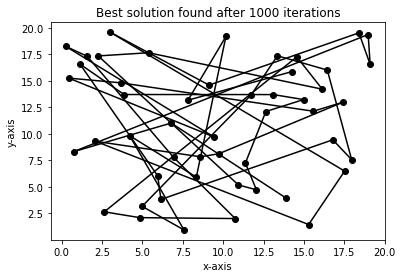

In [21]:
iter_num = 1000
average_fits = genetic_algorithm(data, iter_num = iter_num)

Text(0, 0.5, 'Total distance')

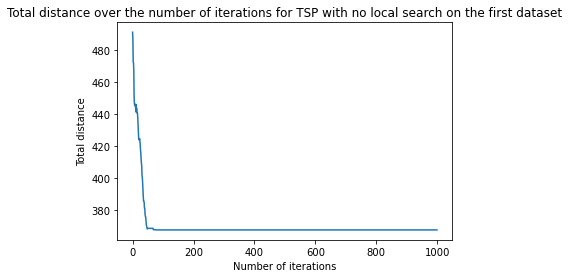

In [22]:
# Print average fits
plt.figure()
plt.plot(list(range(iter_num)), np.full(len(average_fits),-1)*average_fits)
plt.title("Total distance over the number of iterations for TSP with no local search on the first dataset")
plt.xlabel("Number of iterations")
plt.ylabel("Total distance")

[([38, 41, 35, 15, 10, 8, 6, 0, 34, 26, 33, 31, 27, 19, 28, 13, 11, 44, 47, 48, 49, 25, 3, 9, 20, 4, 36, 37, 21, 16, 5, 30, 40, 42, 1, 14, 29, 32, 24, 18, 23, 39, 12, 2, 22, 7, 17, 43, 46, 45], -338.2812278338382), ([38, 41, 35, 15, 10, 8, 6, 0, 34, 26, 33, 31, 27, 19, 28, 13, 11, 44, 47, 48, 49, 25, 3, 9, 20, 4, 36, 37, 21, 16, 5, 30, 40, 42, 1, 14, 29, 32, 24, 18, 23, 39, 12, 2, 22, 7, 17, 43, 46, 45], -338.2812278338382), ([38, 41, 35, 15, 10, 8, 6, 0, 34, 26, 33, 31, 27, 19, 28, 13, 11, 44, 47, 48, 49, 25, 3, 9, 20, 4, 36, 37, 21, 16, 5, 30, 40, 42, 1, 14, 29, 32, 24, 18, 23, 39, 12, 2, 22, 7, 17, 43, 46, 45], -338.2812278338382), ([38, 41, 35, 15, 10, 8, 6, 0, 34, 26, 33, 31, 27, 19, 28, 13, 11, 44, 47, 48, 49, 25, 3, 9, 20, 4, 36, 37, 21, 16, 5, 30, 40, 42, 1, 14, 29, 32, 24, 18, 23, 39, 12, 2, 22, 7, 17, 43, 46, 45], -338.2812278338382), ([38, 41, 35, 15, 10, 8, 6, 0, 34, 26, 33, 31, 27, 19, 28, 13, 11, 44, 47, 48, 49, 25, 3, 9, 20, 4, 36, 37, 21, 16, 5, 30, 40, 42, 1, 14, 29, 3

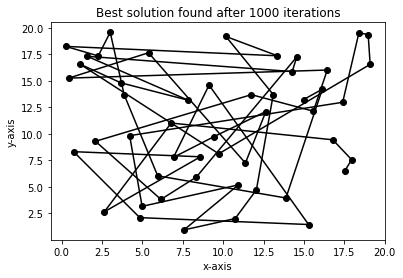

In [23]:
iter_num = 1000
average_fits = genetic_algorithm(data, iter_num = iter_num, loc_search=True)

Text(0, 0.5, 'Total distance')

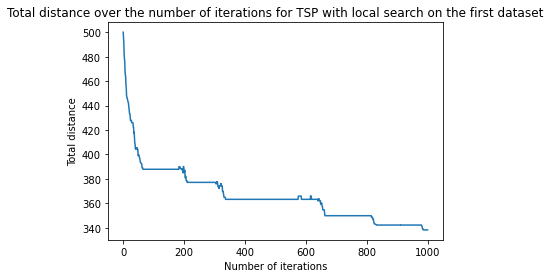

In [24]:
# Print average fits
plt.figure()
plt.plot(list(range(iter_num)), np.full(len(average_fits),-1)*average_fits)
plt.title("Total distance over the number of iterations for TSP with local search on the first dataset")
plt.xlabel("Number of iterations")
plt.ylabel("Total distance")

[([9, 21, 14, 6, 22, 0, 27, 13, 10, 18, 19, 26, 11, 8, 3, 17, 16, 5, 2, 20, 23, 1, 28, 25, 24, 7, 15, 4, 12], -20762.769200214894), ([9, 21, 14, 6, 22, 0, 27, 13, 10, 18, 19, 26, 11, 8, 3, 17, 16, 5, 2, 20, 23, 1, 28, 25, 24, 7, 15, 4, 12], -20762.769200214894), ([9, 21, 14, 6, 22, 0, 27, 13, 10, 18, 19, 26, 11, 8, 3, 17, 16, 5, 2, 20, 23, 1, 28, 25, 24, 7, 15, 4, 12], -20762.769200214894), ([9, 21, 14, 6, 22, 0, 27, 13, 10, 18, 19, 26, 11, 8, 3, 17, 16, 5, 2, 20, 23, 1, 28, 25, 24, 7, 15, 4, 12], -20762.769200214894), ([9, 21, 14, 6, 22, 0, 27, 13, 10, 18, 19, 26, 11, 8, 3, 17, 16, 5, 2, 20, 23, 1, 28, 25, 24, 7, 15, 4, 12], -20762.769200214894)]
Average fit:  -20762.769200214894
Printed instance:  -20762.769200214894


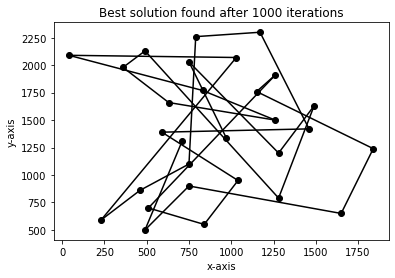

In [25]:
iter_num = 1000
average_fits = genetic_algorithm(data2, iter_num = iter_num)

Text(0, 0.5, 'Total distance')

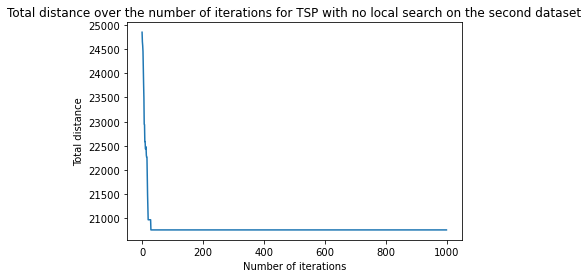

In [26]:
# Print average fits
plt.figure()
plt.plot(list(range(iter_num)), np.full(len(average_fits),-1)*average_fits)
plt.title("Total distance over the number of iterations for TSP with no local search on the second dataset")
plt.xlabel("Number of iterations")
plt.ylabel("Total distance")

[([17, 14, 16, 21, 13, 3, 15, 18, 12, 0, 7, 26, 6, 24, 10, 25, 8, 22, 27, 20, 2, 19, 1, 9, 28, 4, 11, 23, 5], -16036.025318400882), ([17, 14, 16, 21, 13, 3, 15, 18, 12, 0, 7, 26, 6, 24, 10, 25, 8, 22, 27, 20, 2, 19, 1, 9, 28, 4, 11, 23, 5], -16036.025318400882), ([17, 14, 16, 21, 13, 3, 15, 18, 12, 0, 7, 26, 6, 24, 10, 25, 8, 22, 27, 20, 2, 19, 1, 9, 28, 4, 11, 23, 5], -16036.025318400882), ([17, 14, 16, 21, 13, 3, 15, 18, 12, 0, 7, 26, 6, 24, 10, 25, 8, 22, 27, 20, 2, 19, 1, 9, 28, 4, 11, 23, 5], -16036.025318400882), ([17, 14, 16, 21, 13, 3, 15, 18, 12, 0, 7, 26, 6, 24, 10, 25, 8, 22, 27, 20, 2, 19, 1, 9, 28, 4, 11, 23, 5], -16036.025318400882)]
Average fit:  -16036.025318400882
Printed instance:  -16036.025318400882


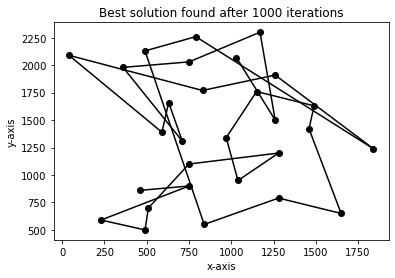

In [27]:
iter_num = 1000
average_fits = genetic_algorithm(data2, iter_num = iter_num, loc_search=True)

Text(0, 0.5, 'Total distance')

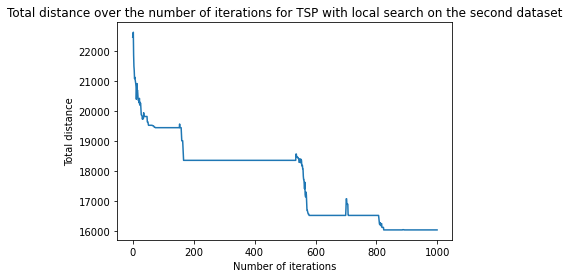

In [28]:
# Print average fits
plt.figure()
plt.plot(list(range(iter_num)), np.full(len(average_fits),-1)*average_fits)
plt.title("Total distance over the number of iterations for TSP with local search on the second dataset")
plt.xlabel("Number of iterations")
plt.ylabel("Total distance")

##### CONCLUSION
The use of the memetic algorithms is more effective. That is possible to see from both of these experiments conducted. The fit (distance) gets lower when using local search. \
As (Merz, Peter, and Bernd Freisleben. "Memetic algorithms for the traveling salesman problem." complex Systems 13.4 (2001): 297-346.) have shown that as well. 

<b>Exercise 7 - (Genetic Programming representation) </b>
<p>a) The function set and terminal set are listed below: </p>
<ul>
  <li>function set: &and;, &rarr; , &or;, &harr;  </li>
  <li>terminal set: y, true, x, z</li>
  <li>s-expression set: &rarr;(&and; y true)(&or; (&or; x y) (&harr; z ( &and; x y))) </li>
</ul>
<p>b) The function set and terminal set are listed below: </p>
<ul>
  <li>function set: *, +, - </li>
  <li>terminal set: 0.234, x, z, 0.789</li>
  <li>s-expression set: +(*0.234 z)(-x 0.789) </li>
</ul>

<b>Exercise 8 - (Genetic Programming behaviour)</b>

In [29]:
random.seed(2021)
#initialize the sets
binary_set = ['+', '-', '*', 'div']
unary_set = ['log', 'exp', 'sin', 'cos']
function_set = binary_set + unary_set

terminal_set = ['x']

full_set = function_set + terminal_set

In [30]:
class Tree(object):
    def __init__(self, name):
        assert name in full_set
        self.name = name
        self.children = []
        if name in terminal_set: self.type = 'term'
        elif name in unary_set: self.type = 'unary'
        else: self.type = 'binary'

    def __repr__(self):
        return '<tree>'

    def __str__(self, l = 0):
        ret = "  " * l + str(l) + ": " + self.name + "\n"
        for child in self.children:
            ret += child.__str__(l + 1)
        return ret

    def add_children(self, node):
        assert isinstance(node, Tree)
        self.children.append(node)

    #get the value of the equation made by this tree for x
    def get_value(self, x):
        if self.name in terminal_set: return x
        elif self.name in unary_set:
            child_value = self.children[0].get_value(x)
            if (child_value == 'error'): return 'error'
            if self.name == 'log':
                if child_value > 0: return math.log(child_value)
                else: return 'error'
            elif self.name == 'exp': 
                if child_value < 700: return math.exp(child_value)
                else: return 'error'
            elif self.name == 'sin': return math.sin(child_value)
            else: return math.cos(child_value)
        else:
            left_child_value = self.children[0].get_value(x)
            rigth_child_value = self.children[1].get_value(x)
            if (left_child_value == 'error' or rigth_child_value == 'error'): return 'error'
            else:
                if self.name == '+': return left_child_value + rigth_child_value
                elif self.name == '-': return left_child_value - rigth_child_value
                elif self.name == '*': return left_child_value * rigth_child_value
                else:
                    if rigth_child_value != 0: return left_child_value / rigth_child_value
                    else: return 'error'
    
    def get_fitness(self, X_Y):
        abs_errors = ['error' if self.get_value(x) == 'error' else abs(self.get_value(x) - y) for (x, y) in X_Y]
        return 'error' if 'error' in abs_errors else sum(abs_errors)

In [31]:
def add_random_children(tree, current_depth, max_depth, grow_method = True):
    if tree.type == 'unary':
        if current_depth + 1 == max_depth:
            child = Tree(random.choice(terminal_set))
            tree.add_children(child)
        else:
            child = Tree(random.choice(full_set)) if grow_method else Tree(random.choice(function_set))
            add_random_children(child, current_depth + 1, max_depth)
            tree.add_children(child)
            
    if tree.type == 'binary':
        if current_depth + 1 == max_depth:
            left_child = Tree(random.choice(terminal_set))
            right_child = Tree(random.choice(terminal_set))
            tree.add_children(left_child)
            tree.add_children(right_child)
        else:
            left_child = Tree(random.choice(full_set)) if grow_method else Tree(random.choice(function_set))
            add_random_children(left_child, current_depth + 1, max_depth)
            right_child = Tree(random.choice(full_set)) if grow_method else Tree(random.choice(function_set))
            add_random_children(right_child, current_depth + 1, max_depth)
            tree.add_children(left_child)
            tree.add_children(right_child)

def create_random_tree(max_depth = 3, grow_method = True):
    tree = Tree(random.choice(full_set))
    add_random_children(tree, 1, max_depth, grow_method)
    return tree

In [32]:
def size_of(tree):
    if tree.type == 'term': return 1
    if tree.type == 'unary': return size_of(tree.children[0]) + 1
    if tree.type == 'binary': return size_of(tree.children[0]) + 1 + size_of(tree.children[1])

def get_random_node(tree):
    if tree.type == 'term': return tree
    
    left_part_size = size_of(tree.children[0])
    
    rand_num = random.randint(1, size_of(tree))
    
    if rand_num <= left_part_size: return get_random_node(tree.children[0])
    elif rand_num == left_part_size + 1: return tree
    else: return get_random_node(tree.children[1])
    
def swap_random_nodes(first_tree, second_tree):
    first_node = get_random_node(first_tree)
    second_node = get_random_node(second_tree)
    
    old_names = (first_node.name, second_node.name)
    old_children = (first_node.children, second_node.children)
    old_types = (first_node.type, second_node.type)
    
    first_node.name = old_names[1]
    first_node.children = old_children[1]
    first_node.type = old_types[1]
    
    second_node.name = old_names[0]
    second_node.children = old_children[0]
    second_node.type = old_types[0]

In [33]:
def create_offsprings(parent1, parent2, crossover_probability = 0.7):
    if random.uniform(0, 1) > crossover_probability:
        return [parent1, parent2]
    else:
        swap_random_nodes(parent_1, parent_2)
        return [parent1, parent2]

In [34]:
def takeSecond(elem):
    return elem[1]

In [35]:
X_Y = [[-1.0, 0.0000], [-0.9, -0.1629], [-0.8, -0.2624], [-0.7, -0.3129], [-0.6, -0.3264], [-0.5, -0.3125], [-0.4, -0.2784], [-0.3, -0.2289], [-0.2, -0.1664], [-0.1, -0.0909], [0, 0.0], [0.1, 0.1111], [0.2, 0.2496], [0.3, 0.4251], [0.4, 0.6496], [0.5, 0.9375], [0.6, 1.3056], [0.7, 1.7731], [0.8, 2.3616], [0.9, 3.0951], [1.0, 4.0000]]

In [36]:
population_size = 1000
generations = range(0, 50)
max_depth = 10

#ramped half-and-half initialisation
new_population = [create_random_tree(max_depth, True) for x in range(0, int(population_size/2))]
new_population += [create_random_tree(max_depth, False) for x in range(0, int(population_size/2))]

In [37]:
import copy
best_from_populations = []

for generation in generations:
    population_and_errors = [(inst, inst.get_fitness(X_Y)) for inst in new_population if inst.get_fitness(X_Y) != 'error']
    population_and_errors.sort(key=takeSecond)
    population, errors = zip(*population_and_errors)

    best_from_populations.append((size_of(population[0]), errors[0]))

    sum_of_errors = sum(errors)
    weights = [error/sum_of_errors for error in errors]

    new_population = []
    #keep top 10
    new_population += population[:10]
    
    #this cycle may take some time and memory due to copying objects
    for j in range(0, int(population_size / 2) - 5):
        parent_1 = copy.deepcopy(random.choices(population=population, weights=weights, k=1)[0])
        parent_2 = copy.deepcopy(random.choices(population=population, weights=weights, k=1)[0])
        new_population += create_offsprings(parent_1, parent_2)

In [38]:
sizes, errors = zip(*best_from_populations)

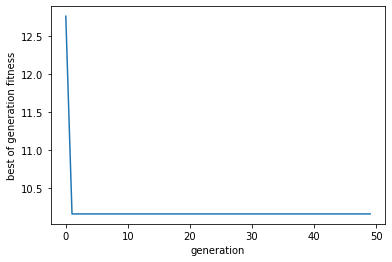

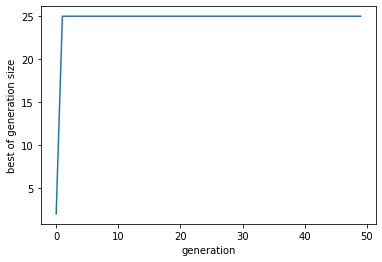

In [39]:
import matplotlib.pyplot as plt

plt.plot(generations, errors)
plt.xlabel('generation')
plt.ylabel('best of generation fitness')
plt.show()

plt.plot(generations, sizes)
plt.xlabel('generation')
plt.ylabel('best of generation size')
plt.show()

<b> Conclusion </b>
<p> As can be seen from the graphs, in this case, there is a great selection pressure, due to which our implementation of the algorithm finds a more or less optimal value in the second generation (by increasing the tree size), and due to the lack of diversity, this value remains dominant. This problem can be solved by replacing the parent selection mechanism: from fitness proportional to a tournament one. It is also possible to improve the algorithm by adjusting the survivor selection and other hyperparameters (e.g. population size, number of generations or additional terminals).</p>